<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/SARIMA_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SARIMA(p,d,q)(P,D,Q,s)

##Seasonal Autoregressive Integrated Moving Averages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#Herramientas
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose #ETS Plots

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Dataset
df= pd.read_csv('co2_mm_mlo.csv')  #promedio mensual de co2 en hawai ppmillon

In [2]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [5]:
#Añadir variable 'date' >#dict o {} para crear variable concatenando otras.
df['date']=pd.to_datetime(dict(year=df['year'], month=df['month'], day=1)) #1958-03-01

In [6]:
#Index date
df.set_index('date', inplace= True)
df.index.freq = 'MS'
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


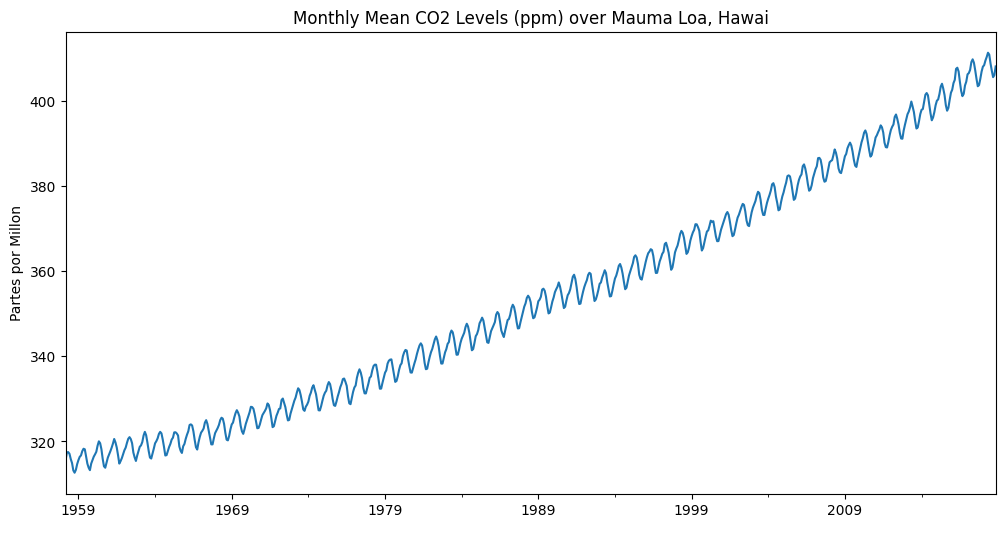

In [7]:
title= 'Monthly Mean CO2 Levels (ppm) over Mauma Loa, Hawai' #promedio de contaminación mensual
ylabel='Partes por Millon'
xlabel= ' '

ax= df['interpolated'].plot(figsize=(12,6), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#Observamos una clara estacionalidad y tendencia al alza.

##Descomposición en 3 factores

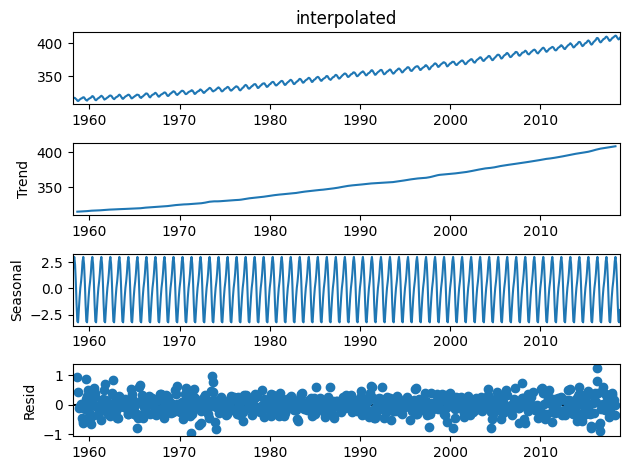

In [ ]:
result= seasonal_decompose(df.interpolated, model='add')
result.plot();



Aunqqe sea pequeña en comparación con la escala de datos, hay una estacionalidad anual

##Dividir en datos de entrenamiento y prueba

In [8]:
len(df) #729 datos
#Entrenamiento mes 717
train= df.iloc[:717]
test= df.iloc[717:]

#Modelo ARIMA estacional
##Modelo SARIMA(0,1,3)(1,0,1,12)

In [9]:
model= SARIMAX(train['interpolated'], order=(0,1,1), seasonal_order=(1,0,1,12)) #tendremos en cuenta lo que pasa 1 año atras= 12 meses
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.166
Date:                            Wed, 14 Jun 2023   AIC                            418.332
Time:                                    15:35:52   BIC                            436.627
Sample:                                03-01-1958   HQIC                           425.397
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3715      0.032    -11.660      0.000      -0.434      -0.309
ar.S.L12       0.9997      0.000   3480.518      0.000       0.999       1.000
ma.S.L12      -0.8661      0.022    -38.823      0.000      -0.910      -0.822
sigma2         0.0961      0.005     20.183      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 3.88
Prob(Q):                              0.70   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
#Obtain predicted values
start= len(train)
end= len(train)+len(test)-1 #termina donde terminan el data set total de datos
predictions = results.predict(start=start, end=end).rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [11]:
#Compare predictions to expected values
for i in range(len(predictions)):
  print(f"predicted={predictions[i]:<11.10}, expected={test['interpolated'][i]}")

predicted=406.5834619, expected=406.81
predicted=407.7857019, expected=407.96
predicted=408.5315973, expected=408.32
predicted=409.4370057, expected=409.41
predicted=410.9942734, expected=410.24
predicted=411.5976078, expected=411.24
predicted=410.8174358, expected=410.79
predicted=409.1267217, expected=408.71
predicted=407.0255392, expected=406.99
predicted=405.5746841, expected=405.51
predicted=405.8451446, expected=406.0
predicted=407.37935  , expected=408.02


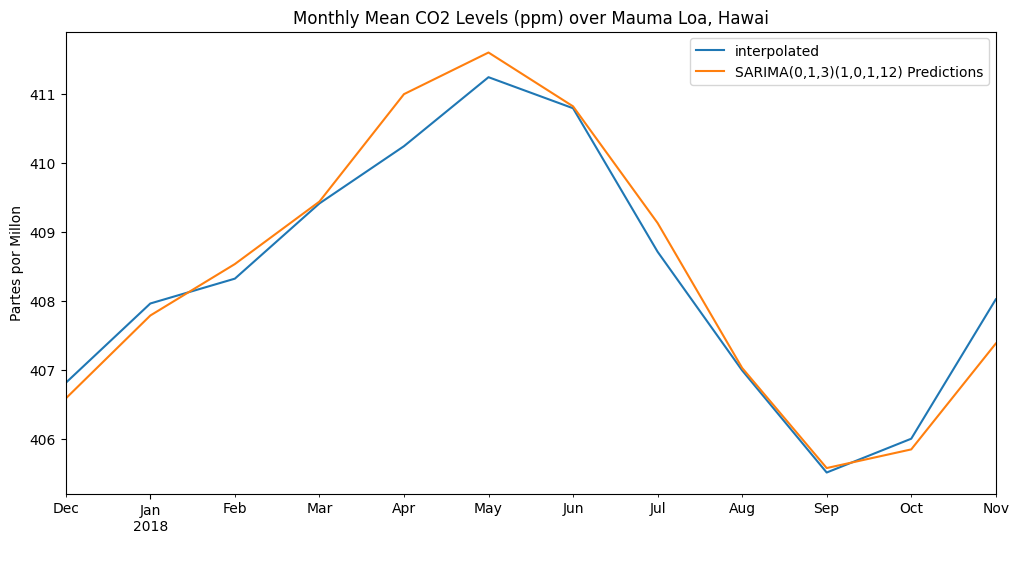

In [14]:
#Plot predictions to expected values
title= 'Monthly Mean CO2 Levels (ppm) over Mauma Loa, Hawai'
ylabel='Partes por Millon'
xlabel= ' '

ax= test['interpolated'].plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

##Reentrenar el modelo con todos los datos y predecir el futuro

In [15]:
model = SARIMAX(df.interpolated, order=(0,1,1), seasonal_order=(1,0,1,12))
results = model.fit()            #predecir 36 meses/3 años
fcast = results.predict(len(df), len(df)+36).rename('SARIMA (0,1,1)(1,0,1,12) Forecast')

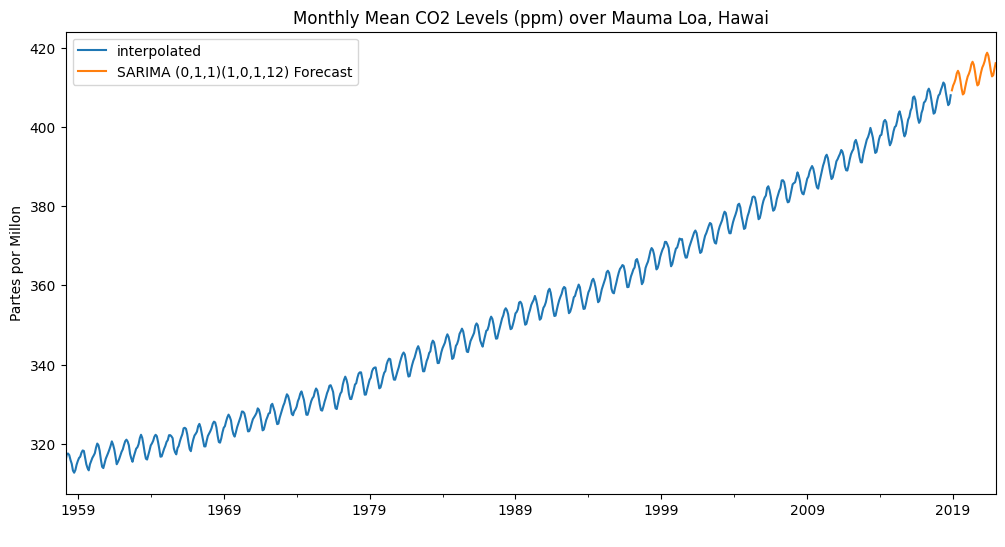

In [17]:
#Plot predictions against known values
title= 'Monthly Mean CO2 Levels (ppm) over Mauma Loa, Hawai'
ylabel='Partes por Millon'
xlabel= ' '

ax= df['interpolated'].plot(legend=True, figsize=(12,6), title=title)
fcast.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel);